<a href="https://colab.research.google.com/github/duybluemind1988/Data-science/blob/master/Marketing_chap_04_Bank_Full_UCI_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Load basic library
import re
import numpy as np
import time
import pandas as pd
from tensorflow import random
from sklearn.externals import joblib 
from scipy import stats

# import require packages for plotting
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt 
import plotly
from plotly import tools
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import seaborn as sns
sns.set()
import altair as alt


# Load Keras
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from keras.models import Sequential
from keras import backend as K

from keras.optimizers import Adam
from keras import regularizers
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from keras.regularizers import l1
from keras.regularizers import l2
from keras.regularizers import l1_l2
from keras.layers import Dropout
from keras.layers import Activation
from keras.layers import Dense
from keras.metrics import categorical_crossentropy


#Load sklearn
from sklearn import preprocessing as pp
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate,cross_val_predict
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.utils import shuffle

from sklearn.metrics import log_loss 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score
from sklearn.metrics import make_scorer
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score,balanced_accuracy_score
from sklearn.metrics import average_precision_score 

from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA, NMF

#ML normal ML
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#ML ensembles
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

#

#Special
import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier

#Load visual neural:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

# cluster
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import cluster, mixture
from sklearn.neighbors import kneighbors_graph
from itertools import cycle, islice

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import MeanShift
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import SpectralClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import OPTICS
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import Birch
from sklearn.mixture import GaussianMixture
from sklearn.mixture import BayesianGaussianMixture

#import fastcluster
#import hdbscan
from scipy.cluster.hierarchy import dendrogram, cophenet, fcluster
from scipy.spatial.distance import pdist

# PCA
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import SparsePCA
from sklearn.decomposition import KernelPCA
from sklearn.decomposition import FastICA 
from sklearn.decomposition import FactorAnalysis
from sklearn.decomposition import MiniBatchDictionaryLearning #other
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import MDS
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE
from sklearn.random_projection import GaussianRandomProjection
from sklearn.random_projection import SparseRandomProjection

#imblearn library
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from collections import Counter

# Load Data

Data Set Information:

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/frankscholten/mahout-sgd-bank-marketing/master/src/main/resources/bank-full.csv',sep=';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [ ]:
df['conversion'] = df['y'].apply(lambda x: 0 if x == 'no' else 1)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,conversion
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0


# Data analysis

- Conversion Rate overall

In [ ]:
conversion_rate_df = pd.DataFrame(
    df.groupby('conversion').count()['y'] / df.shape[0] * 100.0
)
conversion_rate_df

,y
conversion,
0,88.30152
1,11.69848


In [ ]:
conversion_rate_df.T

conversion,0,1
y,88.30152,11.69848


## Conversion Rates by Marital Status

### Method 1 DNN

In [ ]:
def bar_plot(b):
  def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%0.3f' % float(height),
                ha='center', va='bottom')
        
  b=b[:-1]
  n=len(b.columns)-1
  ind = np.array([0,n])  # the x locations for the groups
  width = 0.35       # the width of the bars
  fig, ax = plt.subplots(figsize=(10+n,7))
  x=ind
  #for name in b.columns[:-1]:
  for name in b.columns:
    rects1 = ax.bar(x, b[name], width,label=name)
    x=x+width
    autolabel(rects1)

  ax.legend(bbox_to_anchor=(1.05, 1))
  ax.set_xticks(ind + width / 2)
  ax.set_xticklabels(b.index)
  plt.show()

In [ ]:
a=pd.pivot_table(df,values='conversion',index='y',columns='marital',
               aggfunc='count',margins=True,margins_name = 'Sub-total')
b=a.div(df.groupby(by='marital')['y'].count(), axis=1 )
b

marital,Sub-total,divorced,married,single
y,,,,
no,NaN,0.880545,0.898765,0.850508
yes,NaN,0.119455,0.101235,0.149492
Sub-total,NaN,1.000000,1.000000,1.000000


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


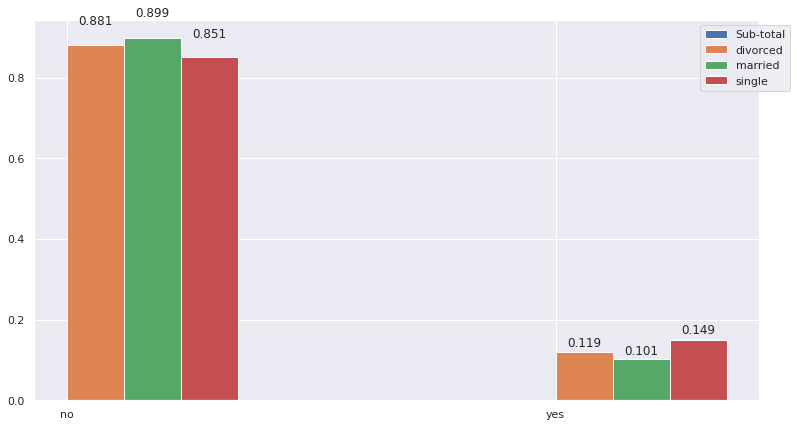

In [ ]:
bar_plot(b)

### Method 2 (book)

In [ ]:
conversion_rate_by_marital = df.groupby(by='marital')['conversion'].sum() \
/ df.groupby(by='marital')['conversion'].count() * 100.0
conversion_rate_by_marital=pd.DataFrame(conversion_rate_by_marital)
conversion_rate_by_marital

,conversion
marital,
divorced,11.945458
married,10.123466
single,14.949179


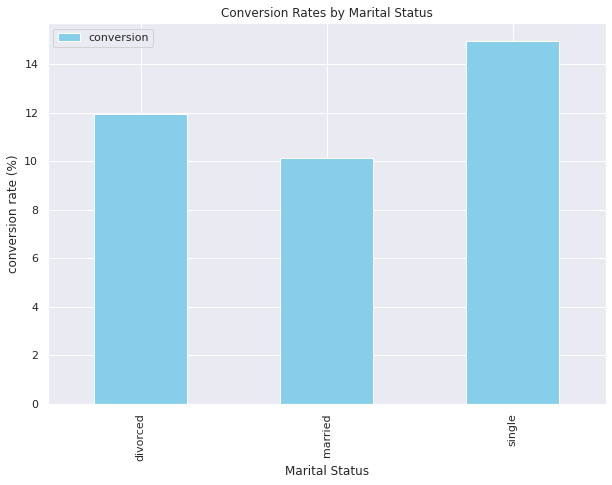

In [ ]:

ax = conversion_rate_by_marital.plot(
    kind='bar',
    color='skyblue',
    grid=True,
    figsize=(10, 7),
    title='Conversion Rates by Marital Status'
)

ax.set_xlabel('Marital Status')
ax.set_ylabel('conversion rate (%)')

plt.show()

In [ ]:
def conversion(name):

  conversion_rate_by_marital = df.groupby(by=name)['conversion'].sum() \
  / df.groupby(by=name)['conversion'].count() * 100.0
  conversion_rate_by_marital=pd.DataFrame(conversion_rate_by_marital)
  x=conversion_rate_by_marital.index
  y=conversion_rate_by_marital.conversion

  plt.figure(figsize=(10,5))
  plt.bar(x,y)
  #plt.title('conversions_by_'+ name)
  plt.xlabel('conversions_by_'+ name)
  plt.ylabel('Conversion Rate (%)')
  plt.xticks(rotation='vertical')

  for x,y in zip(x,y):

      label = "{:.2f} %".format(y)
      plt.annotate(label, # this is the text
                  (x,y), # this is the point to label
                  textcoords="offset points", # how to position the text
                  xytext=(0,10), # distance from text to points (x,y)
                  ha='center') # 
  plt.tight_layout()
  plt.show()

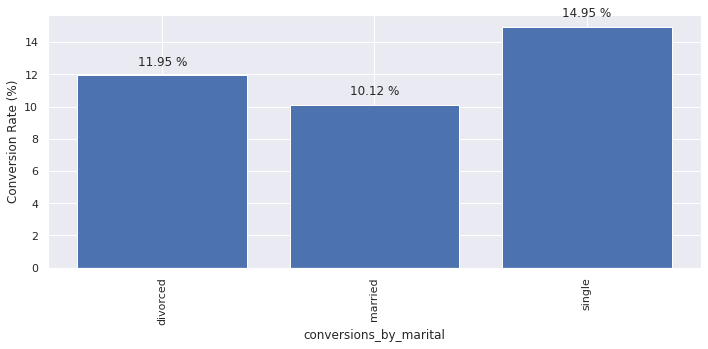

In [ ]:
conversion('marital')

### Function conversion dnn

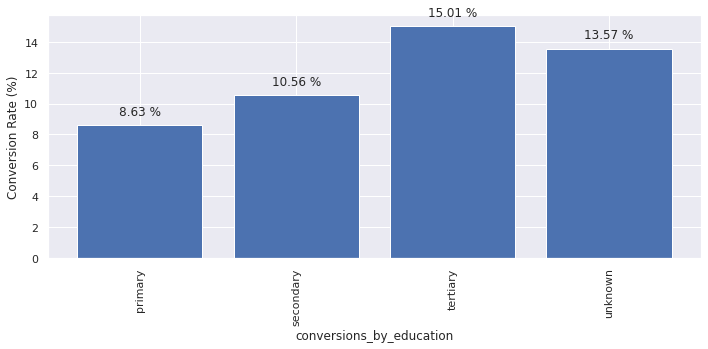

In [ ]:
conversion('education')

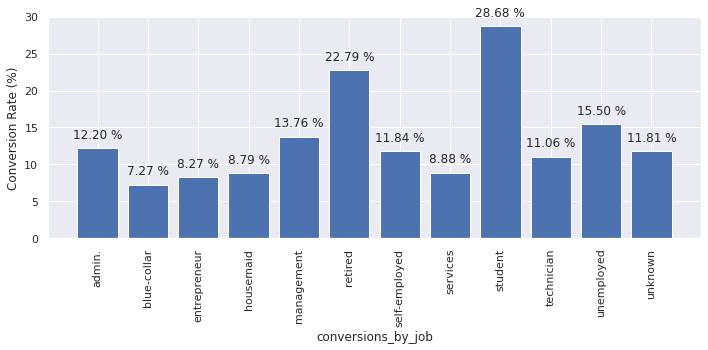

In [ ]:
conversion('job')

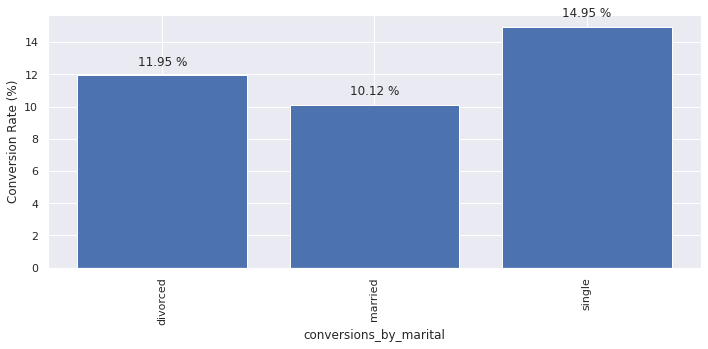

In [ ]:
conversion('marital')

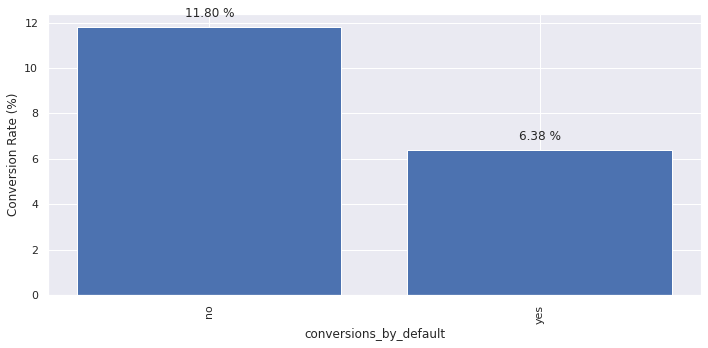

In [ ]:
conversion('default')

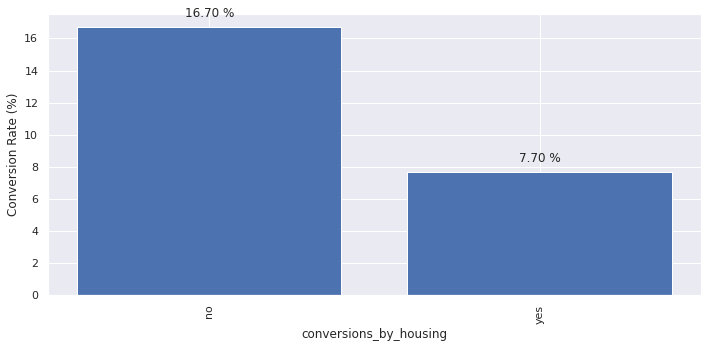

In [ ]:
conversion('housing')

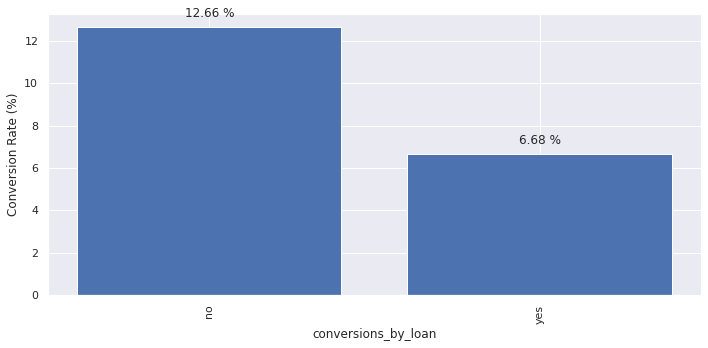

In [ ]:
conversion('loan')

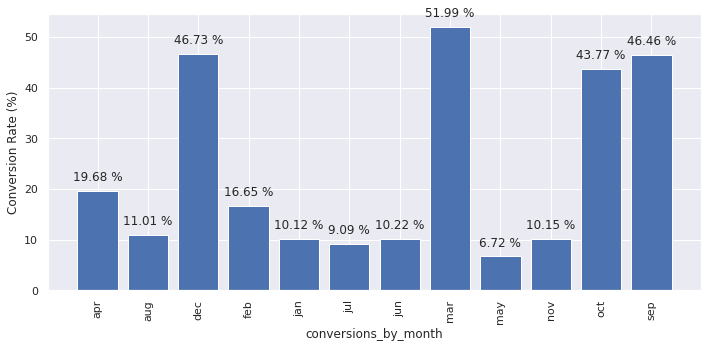

In [ ]:
conversion('month')

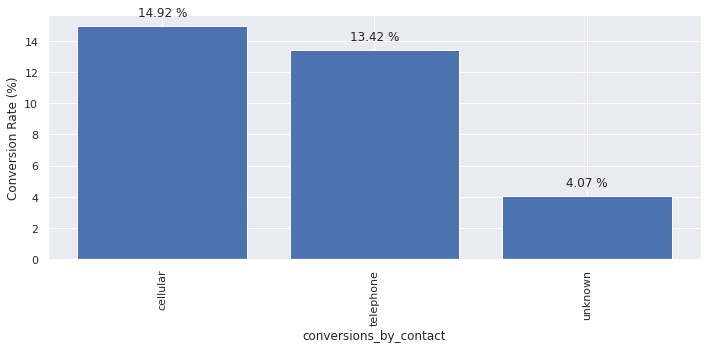

In [ ]:
conversion('contact')

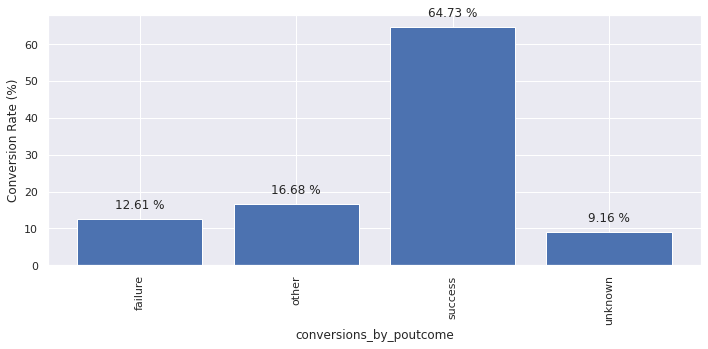

In [ ]:
conversion('poutcome')

### Normal method


- Conversion Rates by Job

In [ ]:
conversion_rate_by_job = df.groupby(
    by='job'
)['conversion'].sum() / df.groupby(
    by='job'
)['conversion'].count() * 100.0

conversion_rate_by_job=pd.DataFrame(conversion_rate_by_job).sort_values(by='conversion',ascending=False)
conversion_rate_by_job

,conversion
job,
student,28.678038
retired,22.791519
unemployed,15.502686
management,13.755551
admin.,12.202669
self-employed,11.842939
unknown,11.805556
technician,11.056996
services,8.883004


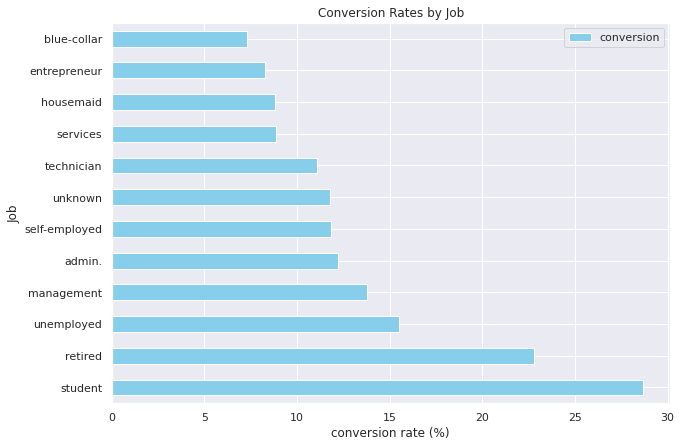

In [ ]:
ax = conversion_rate_by_job.plot(
    kind='barh',
    color='skyblue',
    grid=True,
    figsize=(10, 7),
    title='Conversion Rates by Job'
)

ax.set_xlabel('conversion rate (%)')
ax.set_ylabel('Job')

plt.show()

- Default Rates by Conversions

In [ ]:
default_by_conversion_df  = df.groupby(
    by='default'
)['conversion'].sum() / df.groupby(
    by='default'
)['conversion'].count() * 100.0

default_by_conversion_df =pd.DataFrame(default_by_conversion_df ).sort_values(by='conversion',ascending=False)
default_by_conversion_df

,conversion
default,
no,11.796108
yes,6.380368


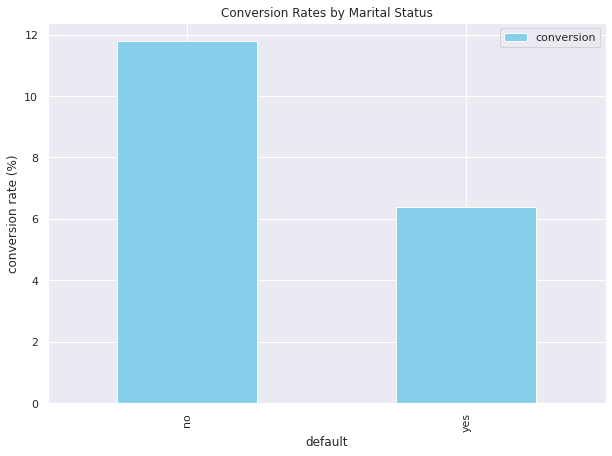

In [ ]:
ax = default_by_conversion_df.plot(
    kind='bar',
    color='skyblue',
    grid=True,
    figsize=(10, 7),
    title='Conversion Rates by Marital Status'
)

ax.set_xlabel('default')
ax.set_ylabel('conversion rate (%)')

plt.show()


- Bank Balance by Conversions

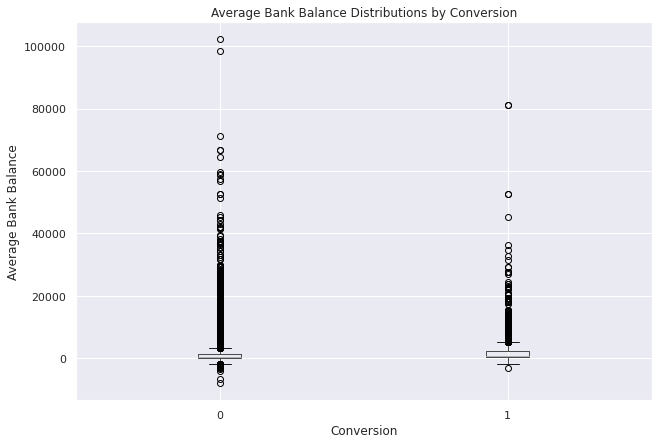

In [ ]:
ax = df[['conversion', 'balance']].boxplot(
    by='conversion',
    showfliers=True,
    figsize=(10, 7)
)

ax.set_xlabel('Conversion')
ax.set_ylabel('Average Bank Balance')
ax.set_title('Average Bank Balance Distributions by Conversion')

plt.suptitle("")
plt.show()

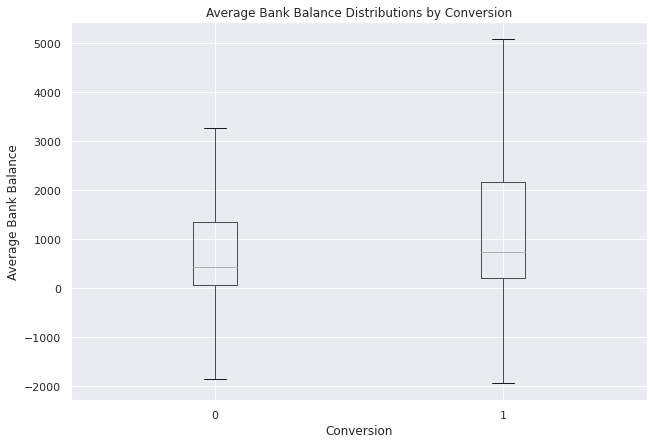

In [ ]:

ax = df[['conversion', 'balance']].boxplot(
    by='conversion',
    showfliers=False,
    figsize=(10, 7)
)

ax.set_xlabel('Conversion')
ax.set_ylabel('Average Bank Balance')
ax.set_title('Average Bank Balance Distributions by Conversion')

plt.suptitle("")
plt.show()

- Conversions by Number of Contacts

In [ ]:
 df.groupby(
    by='campaign'
)['conversion'].count()[:10]

campaign
1     17544
2     12505
3      5521
4      3522
5      1764
6      1291
7       735
8       540
9       327
10      266
Name: conversion, dtype: int64

In [ ]:
df.groupby(
    by='campaign'
)['conversion'].sum()[:10]

campaign
1     2561
2     1401
3      618
4      317
5      139
6       92
7       47
8       32
9       21
10      14
Name: conversion, dtype: int64

In [ ]:
conversions_by_num_contacts = df.groupby(
    by='campaign'
)['conversion'].sum() / df.groupby(
    by='campaign'
)['conversion'].count() * 100.0

conversions_by_num_contacts =pd.DataFrame(conversions_by_num_contacts ).sort_values(by='conversion',ascending=False)
conversions_by_num_contacts[:10]

,conversion
campaign,
1,14.597583
2,11.203519
3,11.193624
32,11.111111
4,9.000568
17,8.695652
11,7.960199
5,7.879819
6,7.126259


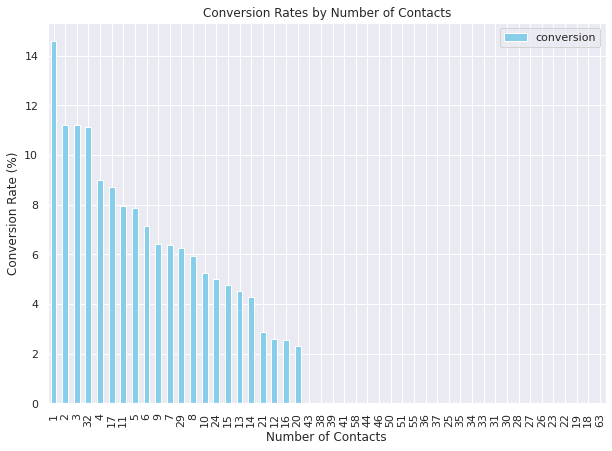

In [ ]:

ax = conversions_by_num_contacts.plot(
    kind='bar',
    figsize=(10, 7),
    title='Conversion Rates by Number of Contacts',
    grid=True,
    color='skyblue'
)

ax.set_xlabel('Number of Contacts')
ax.set_ylabel('Conversion Rate (%)')

plt.show()

In [ ]:
conversions_by_num_months = df.groupby(
    by='month'
)['conversion'].sum() / df.groupby(
    by='month'
)['conversion'].count() * 100.0

conversions_by_num_months =pd.DataFrame(conversions_by_num_months )

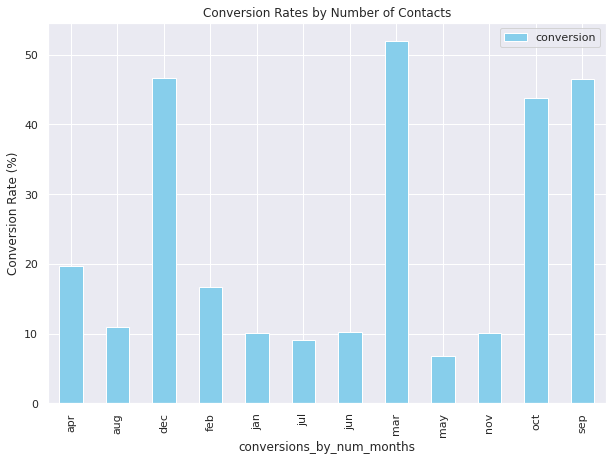

In [ ]:
ax = conversions_by_num_months.plot(
    kind='bar',
    figsize=(10, 7),
    title='Conversion Rates by Number of Contacts',
    grid=True,
    color='skyblue'
)

ax.set_xlabel('conversions_by_num_months')
ax.set_ylabel('Conversion Rate (%)')

plt.show()

# Preprocess Data

In [ ]:
df.dtypes

age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing        int64
loan           int64
contact       object
day            int64
month          int64
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
y             object
conversion     int64
dtype: object

## Label encoder

In [ ]:
df['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [ ]:
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

df['month'] = df['month'].apply(
    lambda x: months.index(x)+1
)

In [ ]:
df['month'].unique()

array([ 5,  6,  7,  8, 10, 11, 12,  1,  2,  3,  4,  9])

In [ ]:
df['housing'].unique()

array(['yes', 'no'], dtype=object)

In [ ]:
df['housing'] = df['housing'].apply(lambda x: 1 if x == 'yes' else 0)

In [ ]:
df['loan'] = df['loan'].apply(lambda x: 1 if x == 'yes' else 0)

In [ ]:
df['default'] = df['default'].apply(lambda x: 1 if x == 'yes' else 0)

## One hot encoder

In [ ]:
df['contact'].unique() # No ?

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [ ]:
df['education'].unique() # No ?

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [ ]:
df['poutcome'].unique() # No ?

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [ ]:
df['marital'].unique() # one hot

array(['married', 'single', 'divorced'], dtype=object)

In [ ]:
df['job'].unique() # one hot

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [ ]:
jobs_encoded_df = pd.get_dummies(df['job'])
jobs_encoded_df.columns = ['job_%s' % x for x in jobs_encoded_df.columns] # join job and df columns
jobs_encoded_df.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
marital_encoded_df = pd.get_dummies(df['marital'])
marital_encoded_df.columns = ['marital_%s' % x for x in marital_encoded_df.columns]
marital_encoded_df.head()

,marital_divorced,marital_married,marital_single
0,0,1,0
1,0,0,1
2,0,1,0
3,0,1,0
4,0,0,1


## X, y and data split

In [ ]:
features = [
    'age',
    'balance',
    'campaign',
    'previous',
    'housing',
] + list(jobs_encoded_df.columns) + list(marital_encoded_df.columns)

response_var = 'conversion'

In [ ]:
df = pd.concat([df, jobs_encoded_df], axis=1)
df = pd.concat([df, marital_encoded_df], axis=1)

In [ ]:
features

['age',
 'balance',
 'campaign',
 'previous',
 'housing',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single']

In [ ]:
X=df[features]
X.head()

,age,balance,campaign,previous,housing,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single
0,58,2143,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,44,29,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,33,2,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,47,1506,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,33,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [ ]:
y=df[response_var]
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: conversion, Length: 45211, dtype: int64

# Decision tree

In [ ]:
from sklearn import tree

In [ ]:

dt_model =tree.DecisionTreeClassifier(
    max_depth=4
)
dt_model.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
dt_model.classes_

array([0, 1])

In [ ]:
import graphviz

In [ ]:
dot_data =tree.export_graphviz(
    dt_model, 
    out_file=None, 
    feature_names=features,  
    class_names=['0', '1'],  
    filled=True, 
    rounded=True,  
    special_characters=True
)

In [ ]:
graph = graphviz.Source(dot_data)

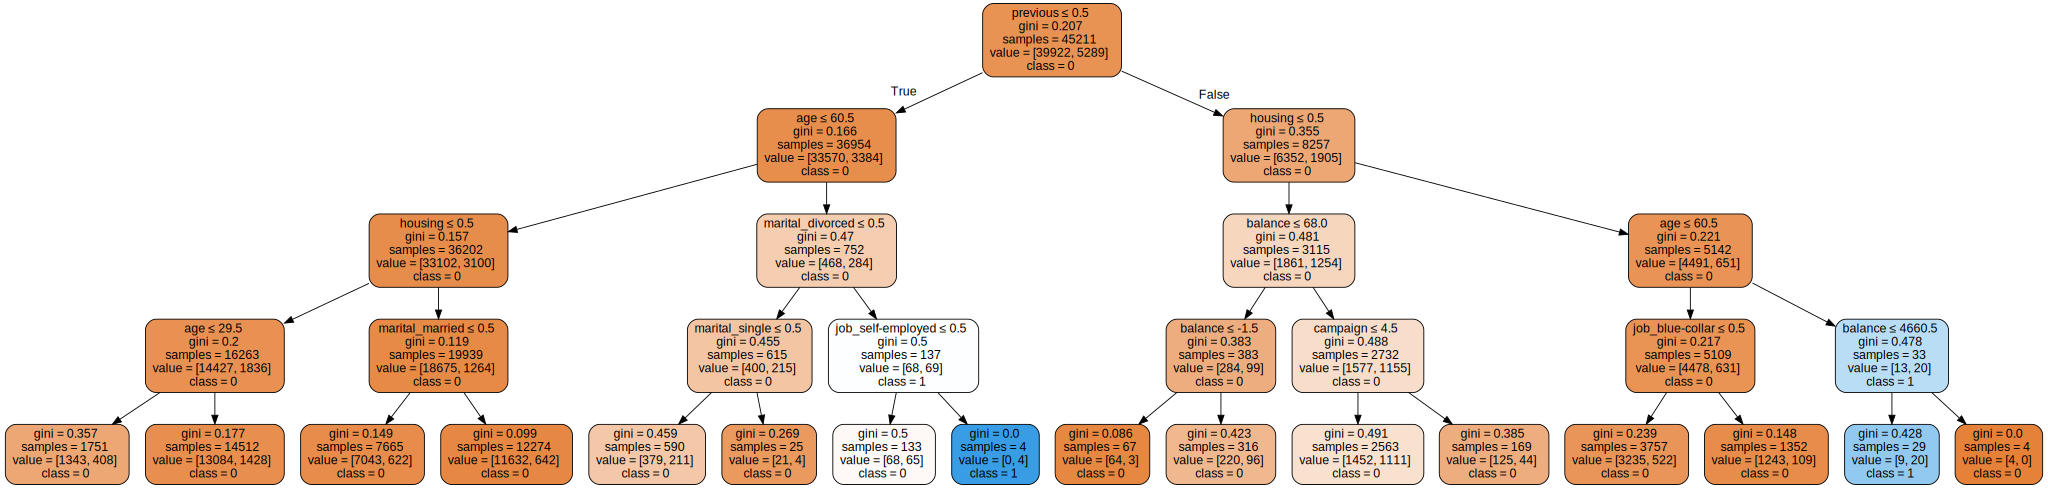

In [ ]:
from IPython.core.display import display, HTML
display(HTML("<style>text {font-size: 10px;}</style>"))

graph

Let's take a look at another example. Those customers that belong to the second leaf node
from the right are those with a value of 1 for the previous variable, a value of 1 for the
housing variable, age greater than 60.5, and balance less than or equal to 4,660.5. In
other words, those customers that were contacted before this campaign and that have a
housing loan, are older than 60.5, and have a bank balance less than 4,660.5 belong to
this node and 20 out of 29 that belong to this node have converted and subscribed to a term
deposit

For example, those customers that
belong to the eighth leaf node from the left are those with a 0 value for the previous
variable, age greater than 60.5, a marital_divorced variable with a value of 1, and
a job_self-employed variable with a value of 1. In other words, those who were not
contacted before this campaign and who are older than 60.5, divorced, and self-employed
belong to this node, and have a high chance of converting.